In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy.abc import n, x
import math

In [77]:
class Function:
    def __init__(self, func, symbol):
        self.func = func
        self.symbol = symbol

    def evaluate(self, x_values):
        return [self.func.subs(self.symbol, i) for i in x_values]

def analyze(f1, f2, start, end, terms, symbol=x):
    func1 = Function(f1, symbol)
    func2 = Function(f2, symbol)
    
    x_values = np.linspace(start, end, terms)
    y_values_f1 = func1.evaluate(x_values)
    y_values_f2 = func2.evaluate(x_values)
    
    
    fig, ax1 = plt.subplots()
    
    ax1.plot(x_values, y_values_f1, c="b", label = "f1")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f1")
    ax1.set_ylim([0, 1])
         
    ax2 = ax1.twinx()
    
    ax2.plot(x_values, y_values_f2, c="r", label = "f2")
    ax2.set_xlabel("x")
    ax2.set_ylabel("f2")
    ax2.set_ylim([0, 100])        
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines+lines2, labels+labels2, loc="best")
    plt.show()

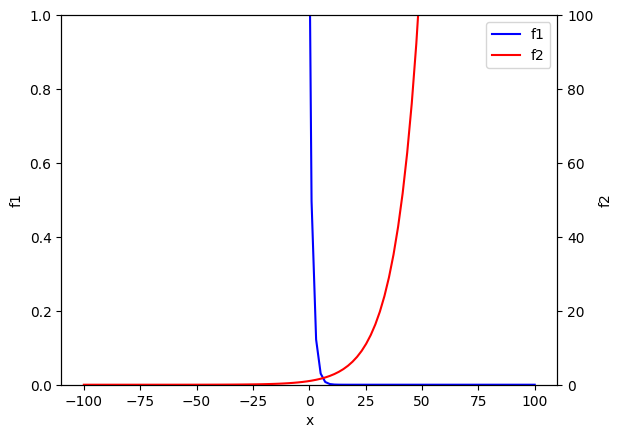

In [78]:
f1 = 1/2**n
f2 = 1.1**n

analyze(f1, f2, -100, 100, 100, n)

In [3]:
def is_converging(a_n, n):
    return sym.Sum(a_n, (n, 1, sym.oo)).is_absolutely_convergent()

In [4]:
f1 = 1/2**n
f2 = 1.1**n
print(is_converging(f1, n))
print(is_converging(f2, n))

True
False


In [5]:
def taylor(f, c, n):
    terms = [sym.diff(f, x, i).subs(x, c) * (x - c)**i / sym.factorial(i) for i in range(n+1)]
    return sum(terms)
taylor(1/x, 1, 10)

-x + (x - 1)**10 - (x - 1)**9 + (x - 1)**8 - (x - 1)**7 + (x - 1)**6 - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2

In [6]:
def maclaurin(f, n):
    return taylor(f, 0, n)
maclaurin(1/2**x, 5)

-x**5*log(2)**5/120 + x**4*log(2)**4/24 - x**3*log(2)**3/6 + x**2*log(2)**2/2 - x*log(2) + 1

In [7]:
f = sym.lambdify(x, 1 / (1 + x ** 2))
a = 0
b = 1

n_terms = 100

x = sym.symbols('x')

maclaurin_series = sym.series(f(x), x, 0, n_terms+1).removeO()

integral = sym.integrate(maclaurin_series, (x, a, b))

pi_approx = 4 * integral.evalf()

error = abs(math.pi - pi_approx)

print(f"Error: {error}")

Error: 0.0196059593972588


In [8]:
def ramanujan(n):
    constant = 9801 / math.sqrt(8)
    res = 0
    for i in range(n + 1):
        numerator = math.factorial(4 * i) * (1103 + 26390 * i)
        denominator = math.factorial(i) * 396 ** (4 * i)
        res += numerator / denominator
    return constant / res

In [9]:
error = abs(math.pi - ramanujan(100))
print(f"Error: {error}")

Error: 4.440892098500626e-15


In [10]:
def compute_fourier_series(f, num_terms):
    PI = math.pi
    TWO_PI = 2 * PI
    a_0 = 1 / TWO_PI * sym.integrate(f, (x, 0, TWO_PI))
    series = a_0
    for n in range(1, num_terms + 1):
        a_n = 1 / PI * sym.integrate(f * sym.cos(n * x), (x, 0, TWO_PI))
        b_n = 1 / PI * sym.integrate(f * sym.sin(n * x), (x, 0, TWO_PI))
        series += a_n * sym.cos(n * x) + b_n * sym.sin(n * x)

    return series

f = sym.exp(x)
num_terms = 5
fourier_approx = compute_fourier_series(f, num_terms)
print(fourier_approx)

-85.0669890181369*sin(x) - 68.0535912145095*sin(2*x) - 51.0401934108821*sin(3*x) - 40.0315242438291*sin(4*x) - 32.7180726992834*sin(5*x) + 85.0669890181368*cos(x) + 34.0267956072547*cos(2*x) + 17.0133978036273*cos(3*x) + 10.0078810609572*cos(4*x) + 6.54361453985664*cos(5*x) + 85.0669890181368
